# Convolutional Autoencoder

In [1]:
%pylab inline
from keras.layers import Input, Convolution2D, MaxPooling2D, UpSampling2D, Dense
from keras.layers import Convolution3D, MaxPooling3D, UpSampling3D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.datasets import cifar10

from IPython.display import SVG, Image
from keras.utils.visualize_util import model_to_dot

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


## Data

In [2]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x.astype('float32')/255.
train_y = train_y.astype('float32')

print('Train x Shape:', train_x.shape)
print('Train y Shape:', train_y.shape)


Train x Shape: (50000, 32, 32, 3)
Train y Shape: (50000, 1)


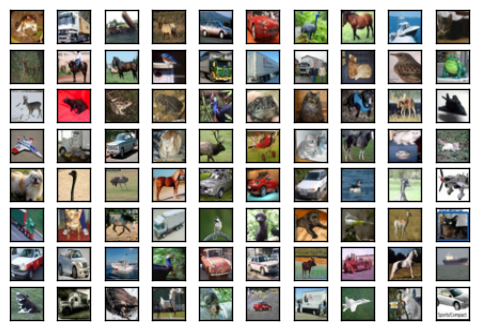

In [3]:
def display(images, size=80):
    for i in range(size):
        ax = subplot(size/10, 10, i+1)
        ax.imshow(images[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
display(train_x[:80])

## Model

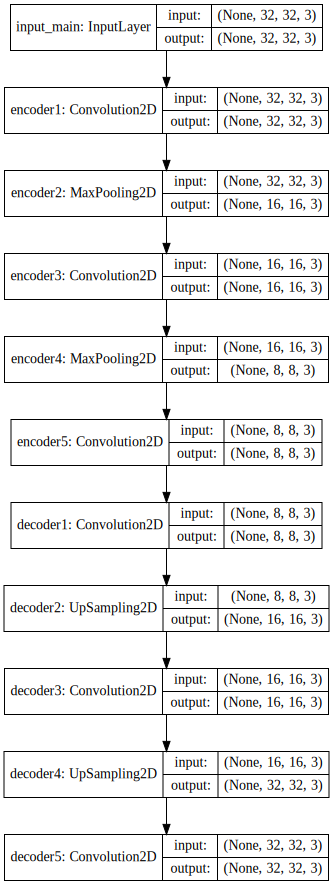

In [4]:
input_main = Input(shape=(32, 32, 3), name='input_main')


encoder1 = Convolution2D(3, 4, 4, activation='relu', border_mode='same', name='encoder1')(input_main)
encoder2 = MaxPooling2D((2, 2), name='encoder2')(encoder1)
encoder3 = Convolution2D(3, 3, 3, activation='relu', border_mode='same', name='encoder3')(encoder2)
encoder4 = MaxPooling2D((2, 2), name='encoder4')(encoder3)
encoder5 = Convolution2D(3, 2, 2, activation='relu', border_mode='same', name='encoder5')(encoder4)

decoder1 = Convolution2D(3, 2, 2, activation='relu', border_mode='same', name='decoder1')(encoder5)
decoder2 = UpSampling2D((2, 2), name='decoder2')(decoder1)
decoder3 = Convolution2D(3, 3, 3, activation='relu', border_mode='same', name='decoder3')(decoder2)
decoder4 = UpSampling2D((2, 2), name='decoder4')(decoder3)
decoder5 = Convolution2D(3, 4, 4, activation='relu', border_mode='same', name='decoder5')(decoder4)

autoencoder = Model(input_main, decoder5)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# # Visualization
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

## Encoder Model

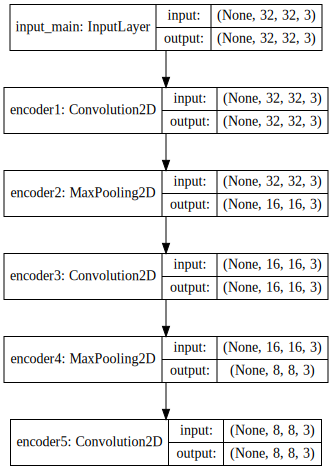

In [5]:
encoder = Model(input=input_main, output=encoder5, name='Encoder')
SVG(model_to_dot(encoder, show_shapes=True).create(prog='dot', format='svg'))

## Decoder Model

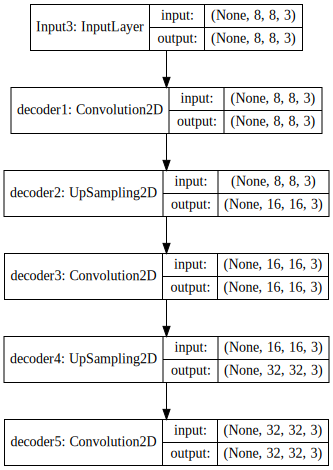

In [6]:
encoder_input = Input(shape=(8, 8, 3), name='Input3')

decoded_layer = autoencoder.layers[-5](encoder_input)
decoded_layer = autoencoder.layers[-4](decoded_layer)
decoded_layer = autoencoder.layers[-3](decoded_layer)
decoded_layer = autoencoder.layers[-2](decoded_layer)
decoded_layer = autoencoder.layers[-1](decoded_layer)

decoder = Model(input=encoder_input, output=decoded_layer)
SVG(model_to_dot(decoder, show_shapes=True).create(prog='dot', format='svg'))

## Train

In [7]:
autoencoder.fit(train_x, train_x,
                nb_epoch=50, 
                batch_size=256, 
                shuffle=True,
                validation_data=(test_x, test_x), 
                verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
5s - loss: 1.3447 - val_loss: -1.9034e+03
Epoch 2/50
3s - loss: 0.7135 - val_loss: -1.9131e+03
Epoch 3/50
3s - loss: 0.6596 - val_loss: -1.9161e+03
Epoch 4/50
3s - loss: 0.6415 - val_loss: -1.9204e+03
Epoch 5/50
3s - loss: 0.6293 - val_loss: -1.9212e+03
Epoch 6/50
3s - loss: 0.6175 - val_loss: -1.9214e+03
Epoch 7/50
3s - loss: 0.6133 - val_loss: -1.9214e+03
Epoch 8/50
3s - loss: 0.6109 - val_loss: -1.9214e+03
Epoch 9/50
3s - loss: 0.6088 - val_loss: -1.9215e+03
Epoch 10/50
3s - loss: 0.6073 - val_loss: -1.9215e+03
Epoch 11/50
3s - loss: 0.6057 - val_loss: -1.9215e+03
Epoch 12/50
3s - loss: 0.6040 - val_loss: -1.9215e+03
Epoch 13/50
3s - loss: 0.6030 - val_loss: -1.9215e+03
Epoch 14/50
3s - loss: 0.6020 - val_loss: -1.9215e+03
Epoch 15/50
3s - loss: 0.6010 - val_loss: -1.9215e+03
Epoch 16/50
3s - loss: 0.6001 - val_loss: -1.9215e+03
Epoch 17/50
3s - loss: 0.5998 - val_loss: -1.9215e+03
Epoch 18/50
3s - loss: 0.5984 - val_loss:

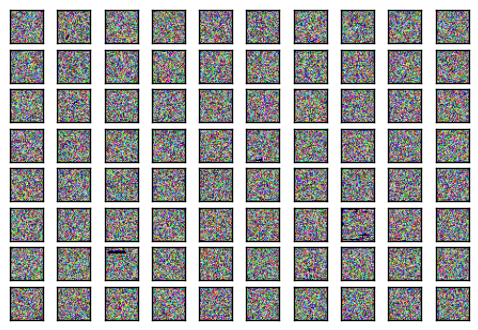

In [9]:
encoded_images = encoder.predict(test_x)
decoded_images = decoder.predict(encoded_images)
display(decoded_images)